In [275]:
import numpy as np
import pandas as pd

In [378]:
acs_2018_a = pd.read_csv('/Users/lucient/Desktop/persp_project/csv_pus_2018_1y/psam_pusa.csv')

In [379]:
variables = ['AGEP', 'SEX', 'SOCP', 'RAC1P', 'PWGTP', 'SCHL']

In [380]:
acs_2018_a = acs_2018_a[variables]

In [381]:
acs_2018_b = pd.read_csv('/Users/lucient/Desktop/persp_project/csv_pus_2018_1y/psam_pusb.csv')

In [382]:
acs_2018_b = acs_2018_b[variables]

In [383]:
df = pd.concat([acs_2018_a, acs_2018_b])

In [384]:
df.to_stata('reg_data.dta')

In [385]:
df.dropna()

,AGEP,SEX,SOCP,RAC1P,PWGTP,SCHL
0,19,2,412010,1,75,18.0
1,18,2,412010,2,75,18.0
2,53,1,31113X,1,118,17.0
4,25,2,537064,1,16,12.0
7,38,1,493040,1,85,12.0
...,...,...,...,...,...,...
1566018,77,1,333050,1,81,16.0
1566019,41,1,431011,1,102,18.0
1566020,34,2,252020,1,93,21.0
1566024,49,2,311131,1,49,19.0


In [386]:
df = df.dropna()

In [387]:
df['SOCP'] = df['SOCP'].map(lambda x: x[:2] + '-' + x[2:])

In [388]:
clf_result = pd.read_csv('clf_result.csv', index_col=0)

In [389]:
'41-2010' in clf_result['SOC Code'].values

False

In [390]:
df.merge(clf_result, left_on='SOCP', right_on='SOC Code', how='left')

,AGEP,SEX,SOCP,RAC1P,PWGTP,SCHL,SOC Code,pred,pred_prob,SOC Official STEM,pred_low_threshold
0,19,2,41-2010,1,75,18.0,NaN,NaN,NaN,NaN,NaN
1,18,2,41-2010,2,75,18.0,NaN,NaN,NaN,NaN,NaN
2,53,1,31-113X,1,118,17.0,NaN,NaN,NaN,NaN,NaN
3,25,2,53-7064,1,16,12.0,53-7064,0.0,0.040380,0.0,False
4,38,1,49-3040,1,85,12.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2090746,77,1,33-3050,1,81,16.0,NaN,NaN,NaN,NaN,NaN
2090747,41,1,43-1011,1,102,18.0,43-1011,0.0,0.136916,0.0,False
2090748,34,2,25-2020,1,93,21.0,NaN,NaN,NaN,NaN,NaN
2090749,49,2,31-1131,1,49,19.0,NaN,NaN,NaN,NaN,NaN


In [457]:
merge_df = df.merge(clf_result, left_on='SOCP', right_on='SOC Code', how='left').dropna()

In [462]:
merge_df

,AGEP,SEX,SOCP,RAC1P,PWGTP,SCHL,SOC Code,pred,pred_prob,SOC Official STEM,pred_low_threshold
3,25,2,53-7064,1,16,12.0,53-7064,0.0,0.040380,0.0,False
6,18,2,27-2022,1,91,18.0,27-2022,1.0,0.243323,0.0,False
9,37,1,53-7062,2,11,16.0,53-7062,0.0,0.044617,0.0,False
10,19,2,43-4171,1,88,19.0,43-4171,0.0,0.098676,0.0,False
11,51,2,43-9041,1,20,20.0,43-9041,0.0,0.122751,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...
2090738,38,1,21-2011,1,245,22.0,21-2011,0.0,0.120935,0.0,False
2090742,70,2,51-6031,1,165,19.0,51-6031,0.0,0.065882,0.0,False
2090744,65,2,43-9061,1,57,20.0,43-9061,0.0,0.075926,0.0,False
2090745,55,2,29-1126,1,80,20.0,29-1126,1.0,0.676486,1.0,True


## Regression: Gender and Racial Gaps

In [393]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [468]:
merge_df = pd.get_dummies(merge_df, columns=['RAC1P', 'SEX', 'SCHL'], prefix=['RAC1P', 'SEX', 'SCHL'], drop_first=True)

In [469]:
merge_df.columns

Index(['AGEP', 'SOCP', 'PWGTP', 'SOC Code', 'pred', 'pred_prob',
       'SOC Official STEM', 'pred_low_threshold', 'RAC1P_2', 'RAC1P_3',
       'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_8', 'RAC1P_9',
       'SEX_2', 'SCHL_2.0', 'SCHL_3.0', 'SCHL_4.0', 'SCHL_5.0', 'SCHL_6.0',
       'SCHL_7.0', 'SCHL_8.0', 'SCHL_9.0', 'SCHL_10.0', 'SCHL_11.0',
       'SCHL_12.0', 'SCHL_13.0', 'SCHL_14.0', 'SCHL_15.0', 'SCHL_16.0',
       'SCHL_17.0', 'SCHL_18.0', 'SCHL_19.0', 'SCHL_20.0', 'SCHL_21.0',
       'SCHL_22.0', 'SCHL_23.0', 'SCHL_24.0'],
      dtype='object')

In [486]:
print(merge_df[['PWGTP', 'SOCP', 'SEX_2', 'AGEP', 'SOC Official STEM', 
          'pred_prob', 'pred_low_threshold', 
          'RAC1P_2', 'RAC1P_3', 'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_8', 'RAC1P_9']].describe().round(2).to_latex())

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
{} &       PWGTP &       SEX\_2 &        AGEP &  SOC Official STEM &   pred\_prob &     RAC1P\_2 &     RAC1P\_3 &     RAC1P\_4 &     RAC1P\_5 &     RAC1P\_6 &     RAC1P\_7 &     RAC1P\_8 &     RAC1P\_9 \\
\midrule
count &  1247722.00 &  1247722.00 &  1247722.00 &         1247722.00 &  1247722.00 &  1247722.00 &  1247722.00 &  1247722.00 &  1247722.00 &  1247722.00 &  1247722.00 &  1247722.00 &  1247722.00 \\
mean  &      101.26 &        0.56 &       44.70 &               0.24 &        0.24 &        0.08 &        0.01 &        0.00 &        0.00 &        0.06 &        0.00 &        0.03 &        0.02 \\
std   &       81.89 &        0.50 &       15.88 &               0.43 &        0.21 &        0.28 &        0.08 &        0.02 &        0.04 &        0.23 &        0.04 &        0.18 &        0.15 \\
min   &        1.00 &        0.00 &       16.00 &               0.00 &        0.02 &        0.00 &        0.00 &        0.00 &        0.00 &        0.0

In [471]:
merge_df.columns

Index(['AGEP', 'SOCP', 'PWGTP', 'SOC Code', 'pred', 'pred_prob',
       'SOC Official STEM', 'pred_low_threshold', 'RAC1P_2', 'RAC1P_3',
       'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_8', 'RAC1P_9',
       'SEX_2', 'SCHL_2.0', 'SCHL_3.0', 'SCHL_4.0', 'SCHL_5.0', 'SCHL_6.0',
       'SCHL_7.0', 'SCHL_8.0', 'SCHL_9.0', 'SCHL_10.0', 'SCHL_11.0',
       'SCHL_12.0', 'SCHL_13.0', 'SCHL_14.0', 'SCHL_15.0', 'SCHL_16.0',
       'SCHL_17.0', 'SCHL_18.0', 'SCHL_19.0', 'SCHL_20.0', 'SCHL_21.0',
       'SCHL_22.0', 'SCHL_23.0', 'SCHL_24.0'],
      dtype='object')

In [472]:
merge_df['AGEP_quad'] = merge_df['AGEP'] ** 2

In [473]:
for race in ['RAC1P_2', 'RAC1P_3', 'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_8', 'RAC1P_9']: 
    merge_df[f'SEX_2 * {race}'] = merge_df['SEX_2'] * merge_df[race]

#### WLS: Y = pred_prob

In [422]:
X_reg = merge_df[['SEX_2']]
pred_prob = merge_df[['pred_prob']]
pred_low_threshold = merge_df[['pred_low_threshold']].astype(int)
official_stem = merge_df[['SOC Official STEM']]
weights = merge_df[['PWGTP']]

wls_reg1 = sm.WLS(np.log(pred_prob), sm.add_constant(X_reg), weights=weights)

result1 = wls_reg1.fit()

In [423]:
X_reg = merge_df[['SEX_2', 'AGEP', 'AGEP_quad']]
pred_prob = merge_df[['pred_prob']]
pred_low_threshold = merge_df[['pred_low_threshold']].astype(int)
official_stem = merge_df[['SOC Official STEM']]
weights = merge_df[['PWGTP']]

wls_reg2 = sm.WLS(np.log(pred_prob), sm.add_constant(X_reg), weights=weights)

result2 = wls_reg2.fit()

In [439]:
X_reg = merge_df[['SEX_2', 'AGEP', 'AGEP_quad', 'RAC1P_2', 'RAC1P_3',
       'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_8', 'RAC1P_9']]
pred_prob = merge_df[['pred_prob']]
pred_low_threshold = merge_df[['pred_low_threshold']].astype(int)
official_stem = merge_df[['SOC Official STEM']]
weights = merge_df[['PWGTP']]

wls_reg3 = sm.WLS(np.log(pred_prob), sm.add_constant(X_reg), weights=weights)

result3 = wls_reg3.fit()

In [440]:
X_reg = merge_df[['SEX_2', 'AGEP', 'AGEP_quad', 'RAC1P_2', 'RAC1P_3',
       'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_8', 'RAC1P_9',
       'SCHL_2.0', 'SCHL_3.0', 'SCHL_4.0', 'SCHL_5.0', 'SCHL_6.0',
       'SCHL_7.0', 'SCHL_8.0', 'SCHL_9.0', 'SCHL_10.0', 'SCHL_11.0',
       'SCHL_12.0', 'SCHL_13.0', 'SCHL_14.0', 'SCHL_15.0', 'SCHL_16.0',
       'SCHL_17.0', 'SCHL_18.0', 'SCHL_19.0', 'SCHL_20.0', 'SCHL_21.0',
       'SCHL_22.0', 'SCHL_23.0', 'SCHL_24.0']]
pred_prob = merge_df[['pred_prob']]
pred_low_threshold = merge_df[['pred_low_threshold']].astype(int)
official_stem = merge_df[['SOC Official STEM']]
weights = merge_df[['PWGTP']]

wls_reg4 = sm.WLS(np.log(pred_prob), sm.add_constant(X_reg), weights=weights)

result4 = wls_reg4.fit()

In [455]:
X_reg = merge_df[['SEX_2', 'AGEP', 'AGEP_quad', 'RAC1P_2', 'RAC1P_3',
       'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_8', 'RAC1P_9', 'SEX_2 * RAC1P_2',
       'SEX_2 * RAC1P_3', 'SEX_2 * RAC1P_4', 'SEX_2 * RAC1P_5',
       'SEX_2 * RAC1P_6', 'SEX_2 * RAC1P_7', 'SEX_2 * RAC1P_8',
       'SEX_2 * RAC1P_9', 
       'SCHL_2.0', 'SCHL_3.0', 'SCHL_4.0', 'SCHL_5.0', 'SCHL_6.0',
       'SCHL_7.0', 'SCHL_8.0', 'SCHL_9.0', 'SCHL_10.0', 'SCHL_11.0',
       'SCHL_12.0', 'SCHL_13.0', 'SCHL_14.0', 'SCHL_15.0', 'SCHL_16.0',
       'SCHL_17.0', 'SCHL_18.0', 'SCHL_19.0', 'SCHL_20.0', 'SCHL_21.0',
       'SCHL_22.0', 'SCHL_23.0', 'SCHL_24.0']]
pred_prob = merge_df[['pred_prob']]
pred_low_threshold = merge_df[['pred_low_threshold']].astype(int)
official_stem = merge_df[['SOC Official STEM']]
weights = merge_df[['PWGTP']]

wls_reg5 = sm.WLS(np.log(pred_prob), sm.add_constant(X_reg), weights=weights)

result5 = wls_reg5.fit()


In [447]:
from statsmodels.iolib.summary2 import summary_col

In [456]:
print(summary_col([result1, result2, result3, result4, result5], regressor_order=['const', 'SEX_2', 'AGEP', 'AGEP_quad', 'RAC1P_2', 'RAC1P_3',
       'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_8', 'RAC1P_9', 'SEX_2 * RAC1P_2',
       'SEX_2 * RAC1P_3', 'SEX_2 * RAC1P_4', 'SEX_2 * RAC1P_5',
       'SEX_2 * RAC1P_6', 'SEX_2 * RAC1P_7', 'SEX_2 * RAC1P_8',
       'SEX_2 * RAC1P_9'], stars=True, ).as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lccccc}
\hline
                  & pred\_prob I & pred\_prob II & pred\_prob III & pred\_prob IIII & pred\_prob IIIII  \\
\midrule
const             & -1.9956***   & -3.1434***    & -3.0968***     & -3.1684***      & -3.1644***        \\
                  & (0.0012)     & (0.0061)      & (0.0061)       & (0.0096)        & (0.0096)          \\
SEX\_2            & 0.2399***    & 0.2323***     & 0.2263***      & 0.1151***       & 0.1075***         \\
                  & (0.0016)     & (0.0016)      & (0.0016)       & (0.0014)        & (0.0016)          \\
AGEP              &              & 0.0499***     & 0.0497***      & 0.0258***       & 0.0257***         \\
                  &              & (0.0003)      & (0.0003)       & (0.0003)        & (0.0003)          \\
AGEP\_quad        &              & -0.0005***    & -0.0005***     & -0.0002***      & -0.0002***        \\
                  &              & (0.0000)      & (0.0000)     

#### Logistic: Y = official_stem

In [482]:
X_reg = merge_df[['SEX_2']]
pred_prob = merge_df[['pred_prob']]
pred_low_threshold = merge_df[['pred_low_threshold']].astype(int)
official_stem = merge_df[['SOC Official STEM']]
weights = merge_df[['PWGTP']]

logit_reg1 = sm.Logit(official_stem, sm.add_constant(X_reg), weights=weights)
result1 = logit_reg1.fit()


X_reg = merge_df[['SEX_2', 'AGEP', 'AGEP_quad']]
logit_reg2 = sm.Logit(official_stem, sm.add_constant(X_reg), weights=weights)
result2 = logit_reg2.fit()

X_reg = merge_df[['SEX_2', 'AGEP', 'AGEP_quad', 'RAC1P_2', 'RAC1P_3',
       'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_8', 'RAC1P_9']]
logit_reg3 = sm.Logit(official_stem, sm.add_constant(X_reg), weights=weights)
result3 = logit_reg3.fit()

X_reg = merge_df[['SEX_2', 'AGEP', 'AGEP_quad', 'RAC1P_2', 'RAC1P_3',
       'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_8', 'RAC1P_9',
       'SCHL_2.0', 'SCHL_3.0', 'SCHL_4.0', 'SCHL_5.0', 'SCHL_6.0',
       'SCHL_7.0', 'SCHL_8.0', 'SCHL_9.0', 'SCHL_10.0', 'SCHL_11.0',
       'SCHL_12.0', 'SCHL_13.0', 'SCHL_14.0', 'SCHL_15.0', 'SCHL_16.0',
       'SCHL_17.0', 'SCHL_18.0', 'SCHL_19.0', 'SCHL_20.0', 'SCHL_21.0',
       'SCHL_22.0', 'SCHL_23.0', 'SCHL_24.0']]
logit_reg4 = sm.Logit(official_stem, sm.add_constant(X_reg), weights=weights)
result4 = logit_reg4.fit()

X_reg = merge_df[['SEX_2', 'AGEP', 'AGEP_quad', 'RAC1P_2', 'RAC1P_3',
       'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_8', 'RAC1P_9', 'SEX_2 * RAC1P_2',
       'SEX_2 * RAC1P_3', 'SEX_2 * RAC1P_4', 'SEX_2 * RAC1P_5',
       'SEX_2 * RAC1P_6', 'SEX_2 * RAC1P_7', 'SEX_2 * RAC1P_8',
       'SEX_2 * RAC1P_9', 
       'SCHL_2.0', 'SCHL_3.0', 'SCHL_4.0', 'SCHL_5.0', 'SCHL_6.0',
       'SCHL_7.0', 'SCHL_8.0', 'SCHL_9.0', 'SCHL_10.0', 'SCHL_11.0',
       'SCHL_12.0', 'SCHL_13.0', 'SCHL_14.0', 'SCHL_15.0', 'SCHL_16.0',
       'SCHL_17.0', 'SCHL_18.0', 'SCHL_19.0', 'SCHL_20.0', 'SCHL_21.0',
       'SCHL_22.0', 'SCHL_23.0', 'SCHL_24.0']]
logit_reg5 = sm.Logit(official_stem, sm.add_constant(X_reg), weights=weights)
result5 = logit_reg5.fit()

Optimization terminated successfully.
         Current function value: 0.533024
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.525671
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.521036
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.428480
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.428047
         Iterations 10


In [483]:
print(summary_col([result1, result2, result3, result4, result5], regressor_order=['const', 'SEX_2', 'AGEP', 'AGEP_quad', 'RAC1P_2', 'RAC1P_3',
       'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_8', 'RAC1P_9', 'SEX_2 * RAC1P_2',
       'SEX_2 * RAC1P_3', 'SEX_2 * RAC1P_4', 'SEX_2 * RAC1P_5',
       'SEX_2 * RAC1P_6', 'SEX_2 * RAC1P_7', 'SEX_2 * RAC1P_8',
       'SEX_2 * RAC1P_9'], stars=True, ).as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lccccc}
\hline
                  & SOC Official STEM I & SOC Official STEM II & SOC Official STEM III & SOC Official STEM IIII & SOC Official STEM IIIII  \\
\midrule
const             & -1.7948***          & -4.1593***           & -4.1092***            & -5.0293***             & -5.0611***               \\
                  & (0.0039)            & (0.0192)             & (0.0193)              & (0.0564)               & (0.0564)                 \\
SEX\_2            & 1.0634***           & 1.0647***            & 1.0623***             & 0.9741***              & 1.0245***                \\
                  & (0.0046)            & (0.0047)             & (0.0047)              & (0.0051)               & (0.0057)                 \\
AGEP              &                     & 0.1046***            & 0.1036***             & 0.0529***              & 0.0529***                \\
                  &                     & (0.0009)             & (0.

#### Logistic: Y = predicted_stem

In [484]:
X_reg = merge_df[['SEX_2']]
pred_prob = merge_df[['pred_prob']]
pred_low_threshold = merge_df[['pred_low_threshold']].astype(int)
official_stem = merge_df[['SOC Official STEM']]
weights = merge_df[['PWGTP']]

logit_reg1 = sm.Logit(pred_low_threshold, sm.add_constant(X_reg), weights=weights)
result1 = logit_reg1.fit()


X_reg = merge_df[['SEX_2', 'AGEP', 'AGEP_quad']]
logit_reg2 = sm.Logit(pred_low_threshold, sm.add_constant(X_reg), weights=weights)
result2 = logit_reg2.fit()

X_reg = merge_df[['SEX_2', 'AGEP', 'AGEP_quad', 'RAC1P_2', 'RAC1P_3',
       'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_8', 'RAC1P_9']]
logit_reg3 = sm.Logit(pred_low_threshold, sm.add_constant(X_reg), weights=weights)
result3 = logit_reg3.fit()

X_reg = merge_df[['SEX_2', 'AGEP', 'AGEP_quad', 'RAC1P_2', 'RAC1P_3',
       'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_8', 'RAC1P_9',
       'SCHL_2.0', 'SCHL_3.0', 'SCHL_4.0', 'SCHL_5.0', 'SCHL_6.0',
       'SCHL_7.0', 'SCHL_8.0', 'SCHL_9.0', 'SCHL_10.0', 'SCHL_11.0',
       'SCHL_12.0', 'SCHL_13.0', 'SCHL_14.0', 'SCHL_15.0', 'SCHL_16.0',
       'SCHL_17.0', 'SCHL_18.0', 'SCHL_19.0', 'SCHL_20.0', 'SCHL_21.0',
       'SCHL_22.0', 'SCHL_23.0', 'SCHL_24.0']]
logit_reg4 = sm.Logit(pred_low_threshold, sm.add_constant(X_reg), weights=weights)
result4 = logit_reg4.fit()

X_reg = merge_df[['SEX_2', 'AGEP', 'AGEP_quad', 'RAC1P_2', 'RAC1P_3',
       'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_8', 'RAC1P_9', 'SEX_2 * RAC1P_2',
       'SEX_2 * RAC1P_3', 'SEX_2 * RAC1P_4', 'SEX_2 * RAC1P_5',
       'SEX_2 * RAC1P_6', 'SEX_2 * RAC1P_7', 'SEX_2 * RAC1P_8',
       'SEX_2 * RAC1P_9', 
       'SCHL_2.0', 'SCHL_3.0', 'SCHL_4.0', 'SCHL_5.0', 'SCHL_6.0',
       'SCHL_7.0', 'SCHL_8.0', 'SCHL_9.0', 'SCHL_10.0', 'SCHL_11.0',
       'SCHL_12.0', 'SCHL_13.0', 'SCHL_14.0', 'SCHL_15.0', 'SCHL_16.0',
       'SCHL_17.0', 'SCHL_18.0', 'SCHL_19.0', 'SCHL_20.0', 'SCHL_21.0',
       'SCHL_22.0', 'SCHL_23.0', 'SCHL_24.0']]
logit_reg5 = sm.Logit(pred_low_threshold, sm.add_constant(X_reg), weights=weights)
result5 = logit_reg5.fit()

Optimization terminated successfully.
         Current function value: 0.509929
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503161
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.498335
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.400715
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.400388
         Iterations 10


In [485]:
print(summary_col([result1, result2, result3, result4, result5], regressor_order=['const', 'SEX_2', 'AGEP', 'AGEP_quad', 'RAC1P_2', 'RAC1P_3',
       'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_8', 'RAC1P_9', 'SEX_2 * RAC1P_2',
       'SEX_2 * RAC1P_3', 'SEX_2 * RAC1P_4', 'SEX_2 * RAC1P_5',
       'SEX_2 * RAC1P_6', 'SEX_2 * RAC1P_7', 'SEX_2 * RAC1P_8',
       'SEX_2 * RAC1P_9'], stars=True, ).as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lccccc}
\hline
                  & pred\_low\_threshold I & pred\_low\_threshold II & pred\_low\_threshold III & pred\_low\_threshold IIII & pred\_low\_threshold IIIII  \\
\midrule
const             & -1.8634***             & -4.2024***              & -4.1476***               & -5.0016***                & -5.0329***                  \\
                  & (0.0040)               & (0.0199)                & (0.0200)                 & (0.0605)                  & (0.0605)                    \\
SEX\_2            & 0.9616***              & 0.9604***               & 0.9578***                & 0.8433***                 & 0.8896***                   \\
                  & (0.0048)               & (0.0048)                & (0.0048)                 & (0.0053)                  & (0.0059)                    \\
AGEP              &                        & 0.1028***               & 0.1018***                & 0.0474***                 & 0.0474***

In [474]:
data = merge_df[merge_df['SEX_2'] == 1]['pred_prob'], merge_df[merge_df['SEX_2'] == 0]['pred_prob']

In [307]:
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


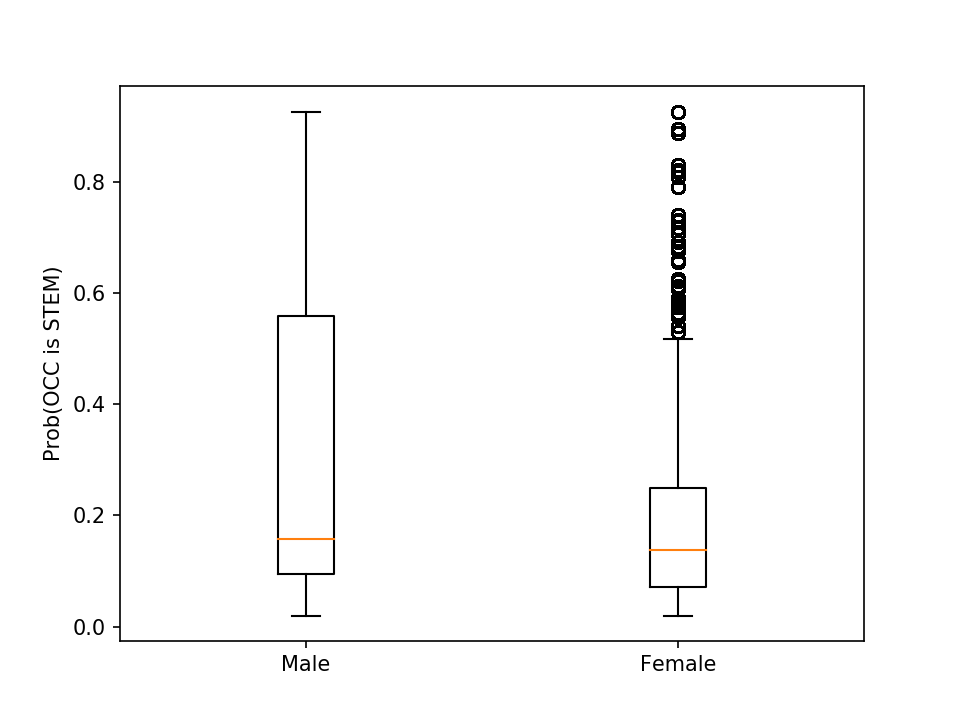

Text(0, 0.5, 'Prob(OCC is STEM)')

In [475]:
plt.boxplot(data, labels=['Male', 'Female'])
plt.ylabel('Prob(OCC is STEM)')